In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Constants
c = 3e8  # speed of light in m/s
fc = 3e9  # center frequency in Hz
B = 2e9  # bandwidth in Hz
Rs = 0  # y-coordinate to scene center (downrange)
Za = 0
L = 8 * 0.3048  # aperture length in meters
Xa = np.linspace(-L / 2, L / 2, 48)  # cross-range positions
Ya = Rs
fsteps = 500

In [9]:
# Target parameters
targets = [
    {'a': 1, 'xt': 2 * 0.3048, 'yt': -10 * 0.3048, 'zt': 0}
    # {'a': 1, 'xt': 0 * 0.3048, 'yt': -5 * 0.3048, 'zt': 0},
    # {'a': 1, 'xt': -2 * 0.3048, 'yt': -10 * 0.3048, 'zt': 0}
]

# Compute Kr (rad/m)
Kr = np.linspace((4 * np.pi / c) * (fc - B / 2), (4 * np.pi / c) * (fc + B / 2), fsteps)

# Compute phase for each target
sif = np.zeros((len(Xa), fsteps), dtype=complex)
for target in targets:
    Rb = np.sqrt((Ya - target['yt'])**2 + (Za - target['zt'])**2)
    Rt = np.sqrt((Xa - target['xt'])**2 + Rb**2)
    phi_if = np.outer(Rt - Rs, Kr)
    sif += target['a'] * np.exp(-1j * phi_if)

# Save the data (optional, e.g., using np.save or pickle)
# np.save('thruwall.npy', sif)

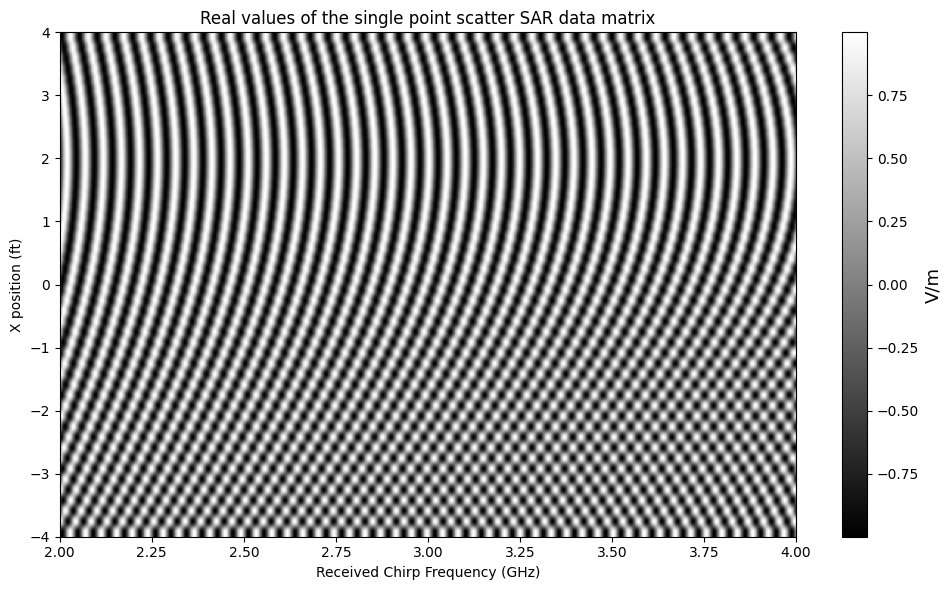

In [10]:
# Plotting the real part of the SAR data matrix
plt.figure(figsize=(10, 6))
extent = [Kr[0] * c / (4 * np.pi * 1e9), Kr[-1] * c / (4 * np.pi * 1e9), Xa[0] / 0.3048, Xa[-1] / 0.3048]
plt.imshow(np.real(sif), extent=extent, aspect='auto', cmap='gray', origin='lower')
plt.xlabel('Received Chirp Frequency (GHz)')
plt.ylabel('X position (ft)')
plt.title('Real values of the single point scatter SAR data matrix')
cbar = plt.colorbar()
cbar.set_label('V/m', fontsize=13)
plt.tight_layout()
plt.savefig('real_value_of_single_pt_scatterer_raw_data.jpg', dpi=100)
plt.show()